In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.externals import joblib

In [67]:
from keras.models import model_from_json

# load json and create model
json_file = open('../saved-model/1/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor = model_from_json(loaded_model_json)
# load weights into new model
regressor.load_weights("../saved-model/1/model.h5")
print("Loaded model from disk")

[labelencoder, onehotencoder, sc] = joblib.load('../saved-model/1/encoders.pkl')


Loaded model from disk


In [68]:
data = pd.read_csv("../data/cleaned_potong1.csv.tar.gz")
data = data.dropna()

In [69]:
def get_X_y(made_data):

    X_cols = ['day_of_week', 'status', 'hour', 'distance_to_next',
            'speed', 'linear_ref']
    y_col = ['time_to_next']
    
    X = made_data[X_cols].values
    y = made_data[y_col].values
    
    return X, y

In [70]:
X, y = get_X_y(data)

In [71]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# labelencoder = LabelEncoder()
X[:, 1] = labelencoder.transform(X[:, 1])
X = onehotencoder.transform(X).toarray()
X = X[:, 1:]
# sc = StandardScaler()
X = sc.transform(X)

In [72]:
y_pred = regressor.predict(X)

In [73]:
diff = abs(y_pred - y)

In [74]:
diff[:, 0].mean(), diff.std()

(49.05529455602359, 47.268961887829391)

In [75]:
data

,cleaned_potong1.csv,gps_timestamp,speed,vehicle_id,linear_inbound,linear_outbound,longitude,latitude,bus_line,status,...,next_time,next_lin_in,next_lin_out,next_status,next_trip_id,next_index,time_to_next,distance_to_next,hour,day_of_week
0,0.0,2017-07-01 07:31:45.800,17.037,3.597391e+14,0.994564,0.016325,98.365890,7.894253,pothong_1,outbound,...,2017-07-01 07:33:16.900,0.951040,0.069102,outbound,1.0,7443.0,91.0,0.052777,7.0,5.0
1,1.0,2017-07-01 07:32:16.100,27.904,3.597391e+14,0.919849,0.028473,98.366143,7.892881,pothong_1,outbound,...,2017-07-01 07:33:46.900,0.906116,0.094132,outbound,1.0,7593.0,90.0,0.065660,7.0,5.0
2,2.0,2017-07-01 07:32:46.600,38.207,3.597391e+14,0.940134,0.052338,98.367384,7.890430,pothong_1,outbound,...,2017-07-01 07:34:17.000,0.881804,0.119428,outbound,1.0,7743.0,90.0,0.067090,7.0,5.0
3,3.0,2017-07-01 07:33:16.900,38.798,3.597391e+14,0.951040,0.069102,98.368734,7.891490,pothong_1,outbound,...,2017-07-01 07:34:47.000,0.853155,0.149162,outbound,1.0,7893.0,90.0,0.080060,7.0,5.0
4,4.0,2017-07-01 07:33:46.900,38.496,3.597391e+14,0.906116,0.094132,98.368699,7.894403,pothong_1,outbound,...,2017-07-01 07:35:17.000,0.822671,0.180796,outbound,1.0,8043.0,90.0,0.086664,7.0,5.0
5,9.0,2017-07-01 07:36:17.300,0.115,3.597391e+14,0.813604,0.190097,98.367658,7.905367,pothong_1,outbound,...,2017-07-01 07:37:48.300,0.774338,0.236949,outbound,3.0,8793.0,91.0,0.046853,7.0,5.0
6,10.0,2017-07-01 07:36:47.900,33.421,3.597391e+14,0.809255,0.199323,98.368453,7.905979,pothong_1,outbound,...,2017-07-01 07:38:18.300,0.759422,0.252347,outbound,3.0,8943.0,90.0,0.053024,7.0,5.0
7,11.0,2017-07-01 07:37:18.200,22.661,3.597391e+14,0.785663,0.225256,98.371352,7.906669,pothong_1,outbound,...,2017-07-01 07:38:48.300,0.751777,0.260238,outbound,3.0,9093.0,90.0,0.034982,7.0,5.0
8,12.0,2017-07-01 07:37:48.300,25.869,3.597391e+14,0.774338,0.236949,98.372697,7.906778,pothong_1,outbound,...,2017-07-01 07:39:18.300,0.738818,0.274189,outbound,3.0,9243.0,90.0,0.037240,7.0,5.0
9,13.0,2017-07-01 07:38:18.300,24.382,3.597391e+14,0.759422,0.252347,98.374458,7.906932,pothong_1,outbound,...,2017-07-01 07:39:48.300,0.735825,0.279911,outbound,3.0,9393.0,90.0,0.027564,7.0,5.0


In [76]:
X2, y2 = get_X_y(data)

In [77]:
X2 = np.array(X2)
X2

array([[5.0, 'outbound', 7.0, 0.052776736222256884, 17.037,
        0.016325129922923003],
       [5.0, 'outbound', 7.0, 0.0656595457445029, 27.904,
        0.0284727293041134],
       [5.0, 'outbound', 7.0, 0.06708983156218581, 38.207,
        0.0523381306918372],
       ..., 
       [2.0, 'outbound', 7.0, 0.9283833456515111, 41.639,
        0.0508862793321459],
       [2.0, 'outbound', 7.0, 0.9109407183876264, 48.458,
        0.0682692076966446],
       [2.0, 'outbound', 7.0, 0.8913052709094265, 45.602,
        0.0952127818437176]], dtype=object)

In [78]:
meter = X2[:, 3] * 13000

In [79]:
meter

array([686.0975708893395, 853.5740946785378, 872.1678103084156, ...,
       12068.983493469645, 11842.229339039142, 11586.968521822544], dtype=object)

/home/aiy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


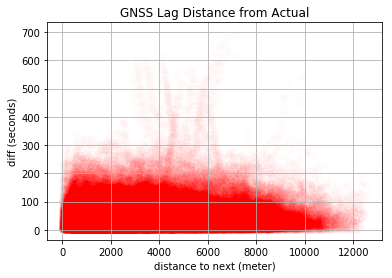

In [80]:
plt.scatter(meter, diff, c='red', alpha=0.01)
plt.xlabel("distance to next (meter)")
plt.ylabel("diff (seconds)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

In [81]:
d = pd.DataFrame({'meter': meter, 'seconds_diff': diff[:,0], 'time_to_next': data['time_to_next'],
                  'index': data['index'], 'next_index': data['next_index']})

In [82]:
d

,index,meter,next_index,seconds_diff,time_to_next
0,6993.0,686.098,7443.0,21.995064,91.0
1,7143.0,853.574,7593.0,20.995064,90.0
2,7293.0,872.168,7743.0,20.995064,90.0
3,7443.0,1040.78,7893.0,20.995064,90.0
4,7593.0,1126.63,8043.0,3.234177,90.0
5,8343.0,609.085,8793.0,14.298630,91.0
6,8493.0,689.307,8943.0,32.462555,90.0
7,8643.0,454.766,9093.0,26.781937,90.0
8,8793.0,484.122,9243.0,37.302887,90.0
9,8943.0,358.334,9393.0,30.001251,90.0


In [83]:
# d = d[d['seconds_diff'] < 10000]

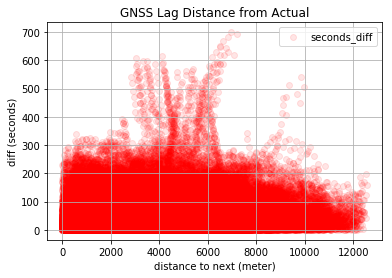

In [84]:
plt.scatter(d['meter'], d['seconds_diff'], c='red', alpha=0.1)
plt.xlabel("distance to next (meter)")
plt.ylabel("diff (seconds)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

In [85]:
d.mean()

index           660726.658476
meter             3462.916809
next_index      664461.394320
seconds_diff        49.055295
time_to_next       764.623032
dtype: float64

In [86]:
d = d[d['seconds_diff'] < 2000]

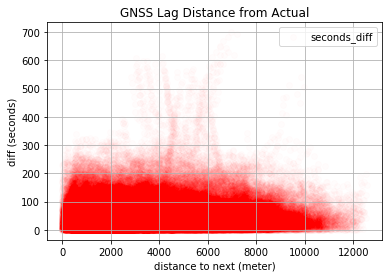

In [87]:
plt.scatter(d['meter'], d['seconds_diff'], c='red', alpha=0.01)
plt.xlabel("distance to next (meter)")
plt.ylabel("diff (seconds)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

In [88]:
d[d['meter'] < 2000]

,index,meter,next_index,seconds_diff,time_to_next
0,6993.0,686.098,7443.0,21.995064,91.0
1,7143.0,853.574,7593.0,20.995064,90.0
2,7293.0,872.168,7743.0,20.995064,90.0
3,7443.0,1040.78,7893.0,20.995064,90.0
4,7593.0,1126.63,8043.0,3.234177,90.0
5,8343.0,609.085,8793.0,14.298630,91.0
6,8493.0,689.307,8943.0,32.462555,90.0
7,8643.0,454.766,9093.0,26.781937,90.0
8,8793.0,484.122,9243.0,37.302887,90.0
9,8943.0,358.334,9393.0,30.001251,90.0


In [89]:
data['time_to_next'].mean()

764.6230322955871

In [90]:
print(d[(d['meter'] < 2000) & (d['meter'] > 1000)].mean(), d[(d['meter'] < 2000) & (d['meter'] > 1000)].std())

index           653619.220312
meter             1491.432191
next_index      655382.333974
seconds_diff        47.268572
time_to_next       357.058390
dtype: float64 index           383730.335834
meter              291.345856
next_index      383551.368591
seconds_diff        40.846534
time_to_next       174.504475
dtype: float64


In [91]:
d.groupby(pd.cut(d["meter"], 20)).mean()

,index,next_index,seconds_diff,time_to_next
meter,,,,
"(-12.554, 627.695]",616804.792251,617626.504819,43.963343,165.189703
"(627.695, 1255.39]",650420.523640,651636.140293,45.586935,245.034319
"(1255.39, 1883.085]",655206.919069,657041.165932,47.613397,371.588798
"(1883.085, 2510.779]",654038.873125,656522.727009,47.609061,505.161339
"(2510.779, 3138.474]",647443.585342,650633.291238,48.590670,650.547146
"(3138.474, 3766.169]",660885.900293,664735.008087,50.662480,785.839340
"(3766.169, 4393.864]",664204.436635,668668.182547,51.900027,912.063522
"(4393.864, 5021.559]",670192.498154,675206.641075,52.538007,1029.707515
"(5021.559, 5649.254]",671306.759785,676939.892042,52.032375,1156.354452


In [92]:
d.groupby(pd.cut(d["meter"], 20)).std()

,index,next_index,seconds_diff,time_to_next
meter,,,,
"(-12.554, 627.695]",362090.142679,362025.316008,41.112528,98.107375
"(627.695, 1255.39]",380996.477110,380860.810820,40.367908,142.652745
"(1255.39, 1883.085]",384159.138204,383976.032568,40.971513,170.658222
"(1883.085, 2510.779]",380198.540539,379952.701800,41.399052,200.702992
"(2510.779, 3138.474]",381411.584705,381094.109767,43.760936,237.228426
"(3138.474, 3766.169]",383378.319705,383046.863554,50.293330,260.450133
"(3766.169, 4393.864]",384300.714577,383940.834710,53.779884,277.857469
"(4393.864, 5021.559]",386286.716671,385929.418605,54.892036,289.796203
"(5021.559, 5649.254]",384171.891514,383780.840847,55.179473,311.107928


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27175b7630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2717f88048>]], dtype=object)

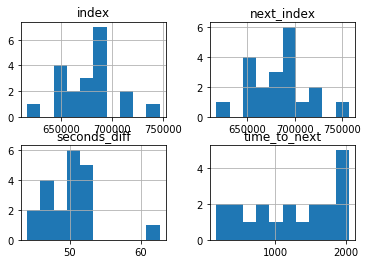

In [93]:
%matplotlib inline
d.groupby(pd.cut(d["meter"], 20)).mean().hist()

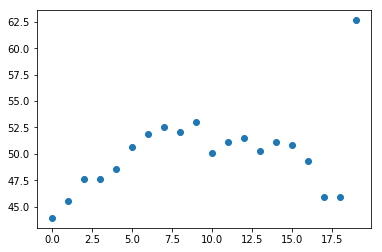

In [94]:
plt.scatter(range(20), d.groupby(pd.cut(d["meter"], 20))['seconds_diff'].mean())
plt.show()

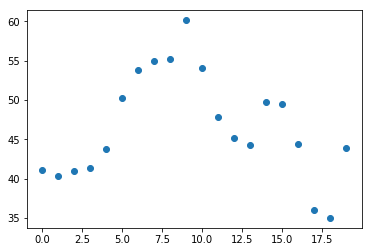

In [95]:
plt.scatter(range(20), d.groupby(pd.cut(d["meter"], 20))['seconds_diff'].std())
plt.show()

In [96]:
d.groupby(pd.cut(d["meter"], 20))

In [97]:
d['group'] = (d['meter']/1000).astype(int)

In [98]:
d

,index,meter,next_index,seconds_diff,time_to_next,group
0,6993.0,686.098,7443.0,21.995064,91.0,0
1,7143.0,853.574,7593.0,20.995064,90.0,0
2,7293.0,872.168,7743.0,20.995064,90.0,0
3,7443.0,1040.78,7893.0,20.995064,90.0,1
4,7593.0,1126.63,8043.0,3.234177,90.0,1
5,8343.0,609.085,8793.0,14.298630,91.0,0
6,8493.0,689.307,8943.0,32.462555,90.0,0
7,8643.0,454.766,9093.0,26.781937,90.0,0
8,8793.0,484.122,9243.0,37.302887,90.0,0
9,8943.0,358.334,9393.0,30.001251,90.0,0


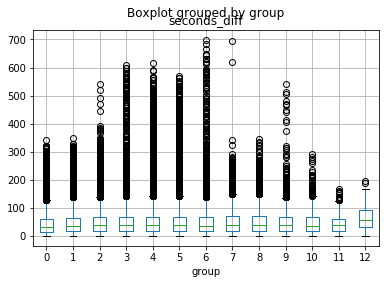

In [99]:
d.boxplot(column='seconds_diff',by='group')

In [100]:
d[(d['group'] == 0) & (d['seconds_diff'] > 200)]

,index,meter,next_index,seconds_diff,time_to_next,group
159,36495.0,603.211,36945.0,203.581299,90.0,0
160,36645.0,650.743,37095.0,256.844360,90.0,0
161,36795.0,502.436,37245.0,237.087524,90.0,0
304,62628.0,489.831,63078.0,221.949921,92.0,0
6099,1213620.0,808.173,1214070.0,203.391510,90.0,0
6100,1213770.0,649.048,1214220.0,214.958374,90.0,0
6101,1213920.0,392.044,1214370.0,208.659698,90.0,0
6947,36495.0,798.16,37095.0,249.209351,120.0,0
6948,36645.0,766.559,37245.0,246.329468,120.0,0
6949,36795.0,585.376,37395.0,218.972687,121.0,0


In [101]:
d[(d['group'] == 0)]

,index,meter,next_index,seconds_diff,time_to_next,group
0,6993.0,686.098,7443.0,21.995064,91.0,0
1,7143.0,853.574,7593.0,20.995064,90.0,0
2,7293.0,872.168,7743.0,20.995064,90.0,0
5,8343.0,609.085,8793.0,14.298630,91.0,0
6,8493.0,689.307,8943.0,32.462555,90.0,0
7,8643.0,454.766,9093.0,26.781937,90.0,0
8,8793.0,484.122,9243.0,37.302887,90.0,0
9,8943.0,358.334,9393.0,30.001251,90.0,0
10,9093.0,256.909,9543.0,26.968819,90.0,0
11,9243.0,183.313,9693.0,21.281555,91.0,0
